# Project Title:Speech Emotion Recognition

# Prepared by:Swapan Kumar Shee,B.Tech(C.S.E),3rd Year

# Institute:University of Engineering & Management Jaipur (UEM)

# Organization:CodersCave,AICTE

In [61]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
       # print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Import Libraries

In [62]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM , Dropout
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
print("Library imported successfully")

Library imported successfully


# Load The Dataset

In [63]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded successfullly')

Dataset is Loaded successfullly


In [64]:
len(paths)

2800

# Creating The DataFrame

In [65]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head().style.set_properties(**{'background-color':'Olive','color':'black','border-color':'#8b8c8c'})

,speech,label
0,/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_home_fear.wav,fear
1,/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_youth_fear.wav,fear
2,/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_near_fear.wav,fear
3,/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_search_fear.wav,fear
4,/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_pick_fear.wav,fear


# Understanding The DataSet

In [66]:
df

,speech,label
0,/kaggle/input/toronto-emotional-speech-set-tes...,fear
1,/kaggle/input/toronto-emotional-speech-set-tes...,fear
2,/kaggle/input/toronto-emotional-speech-set-tes...,fear
3,/kaggle/input/toronto-emotional-speech-set-tes...,fear
4,/kaggle/input/toronto-emotional-speech-set-tes...,fear
...,...,...
2795,/kaggle/input/toronto-emotional-speech-set-tes...,ps
2796,/kaggle/input/toronto-emotional-speech-set-tes...,ps
2797,/kaggle/input/toronto-emotional-speech-set-tes...,ps
2798,/kaggle/input/toronto-emotional-speech-set-tes...,ps


In [67]:
df['label'].value_counts()

fear       400
angry      400
disgust    400
neutral    400
sad        400
ps         400
happy      400
Name: label, dtype: int64

In [68]:
df['label'] = df['label'].astype('category')

In [69]:
df['label']

0       fear
1       fear
2       fear
3       fear
4       fear
        ... 
2795      ps
2796      ps
2797      ps
2798      ps
2799      ps
Name: label, Length: 2800, dtype: category
Categories (7, object): ['angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad']

# Encoding

# Label Encoding

In [70]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Convert the labels to numerical values
df['labels_encoded'] = label_encoder.fit_transform(df['label'])

In [71]:
df['labels_encoded']

0       2
1       2
2       2
3       2
4       2
       ..
2795    5
2796    5
2797    5
2798    5
2799    5
Name: labels_encoded, Length: 2800, dtype: int64

# Countplot of Label

<Axes: ylabel='count'>

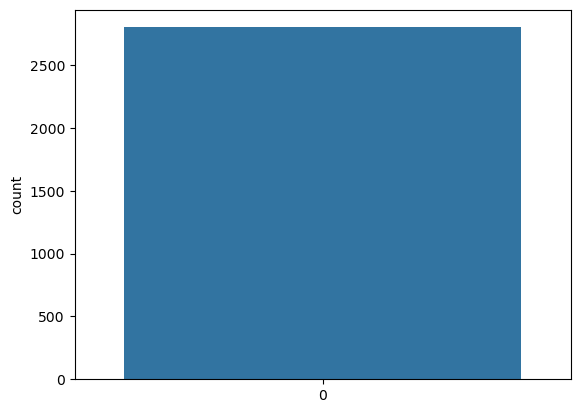

In [72]:
sns.countplot(df['labels_encoded'])

# One Hot Encoding

In [73]:
one_hot_encoded = pd.get_dummies(df['label'])
one_hot_encoded

,angry,disgust,fear,happy,neutral,ps,sad
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
2795,0,0,0,0,0,1,0
2796,0,0,0,0,0,1,0
2797,0,0,0,0,0,1,0
2798,0,0,0,0,0,1,0


<Axes: ylabel='count'>

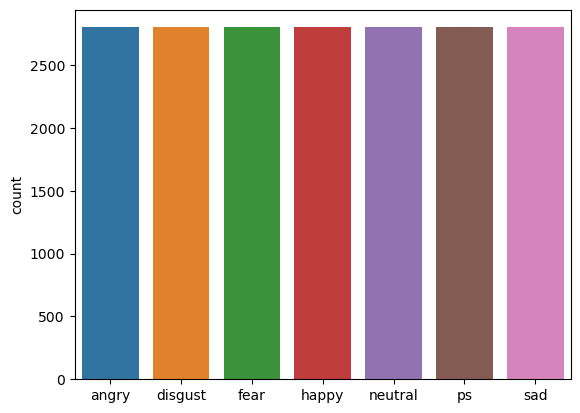

In [74]:
sns.countplot(one_hot_encoded)

In [75]:
df

,speech,label,labels_encoded
0,/kaggle/input/toronto-emotional-speech-set-tes...,fear,2
1,/kaggle/input/toronto-emotional-speech-set-tes...,fear,2
2,/kaggle/input/toronto-emotional-speech-set-tes...,fear,2
3,/kaggle/input/toronto-emotional-speech-set-tes...,fear,2
4,/kaggle/input/toronto-emotional-speech-set-tes...,fear,2
...,...,...,...
2795,/kaggle/input/toronto-emotional-speech-set-tes...,ps,5
2796,/kaggle/input/toronto-emotional-speech-set-tes...,ps,5
2797,/kaggle/input/toronto-emotional-speech-set-tes...,ps,5
2798,/kaggle/input/toronto-emotional-speech-set-tes...,ps,5


# Plot waveplot and spectogram

In [76]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

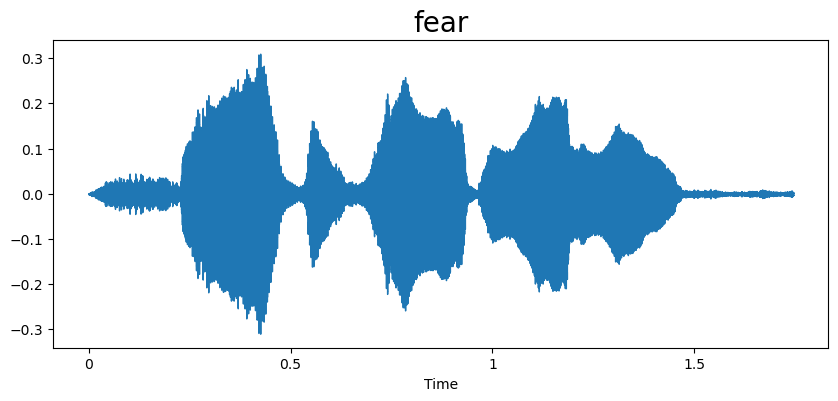

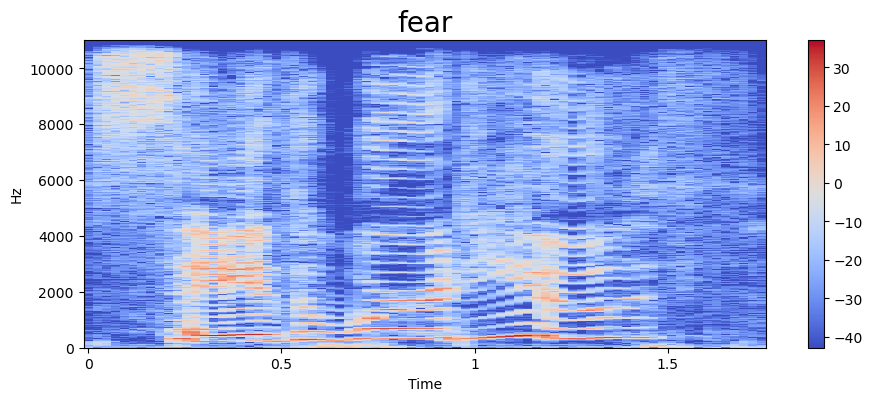

In [77]:
emotion='fear'
path=np.array(df['speech'][df['label']==emotion])[1]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

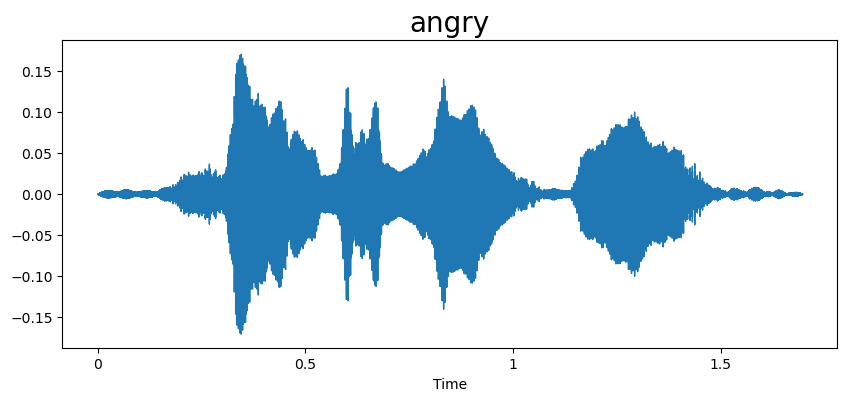

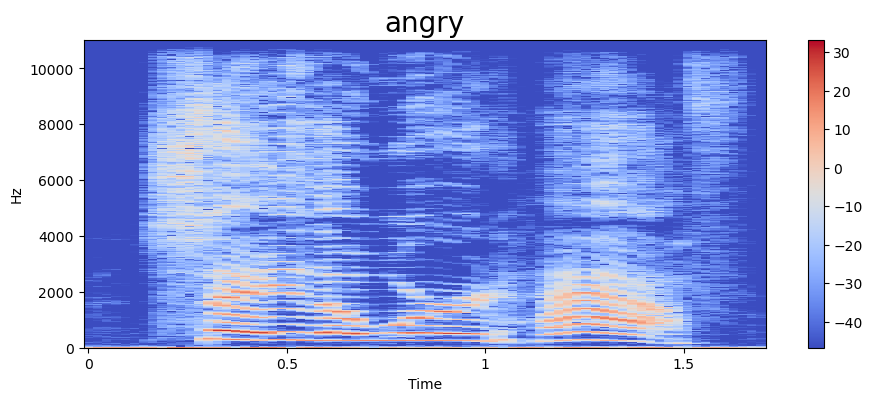

In [78]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

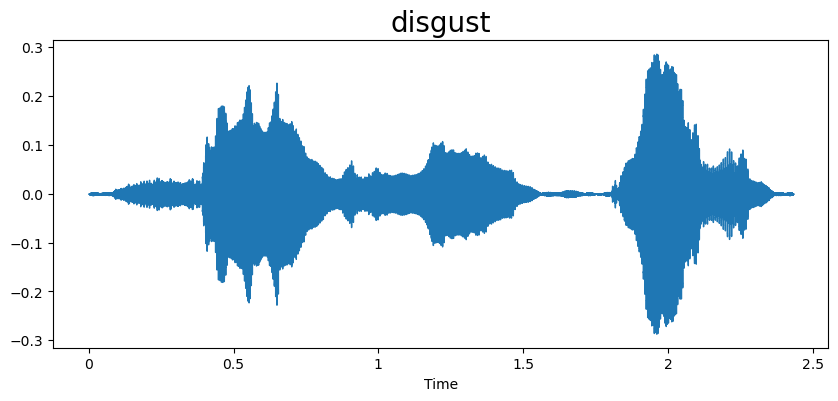

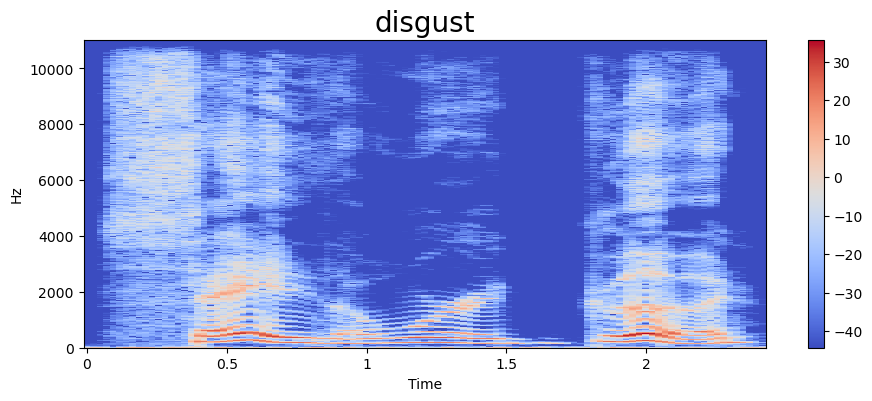

In [79]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

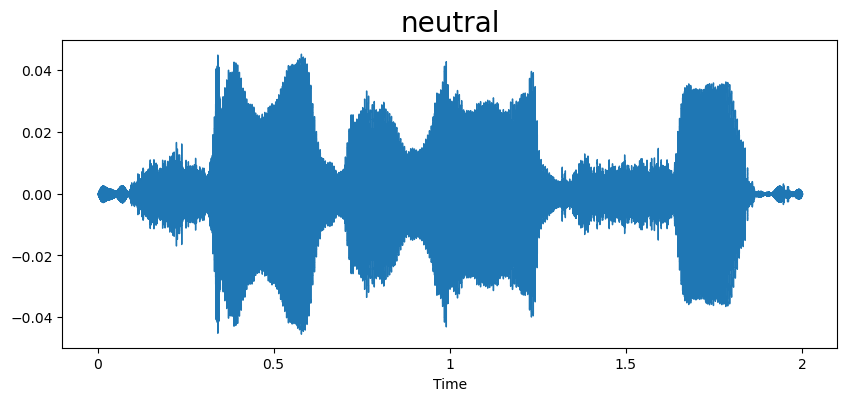

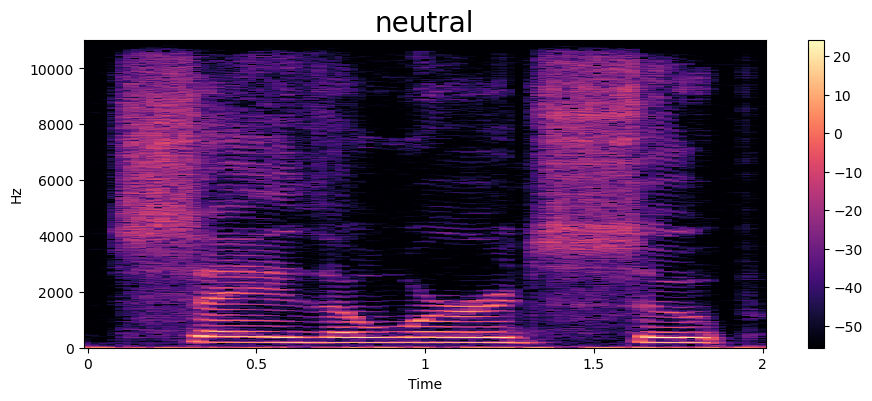

In [80]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

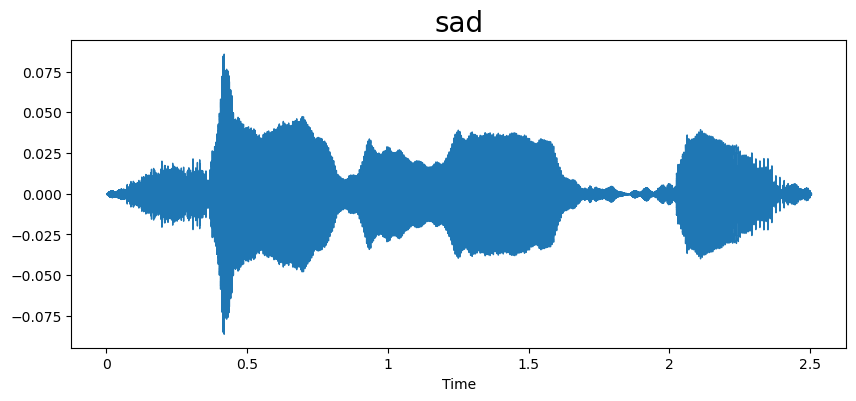

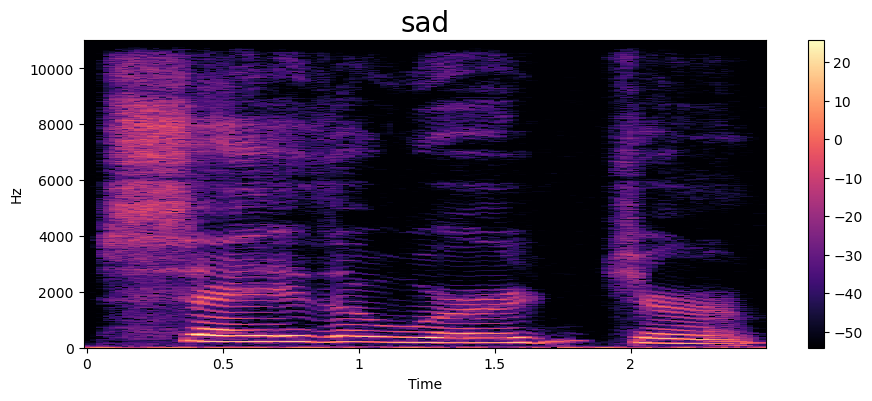

In [81]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


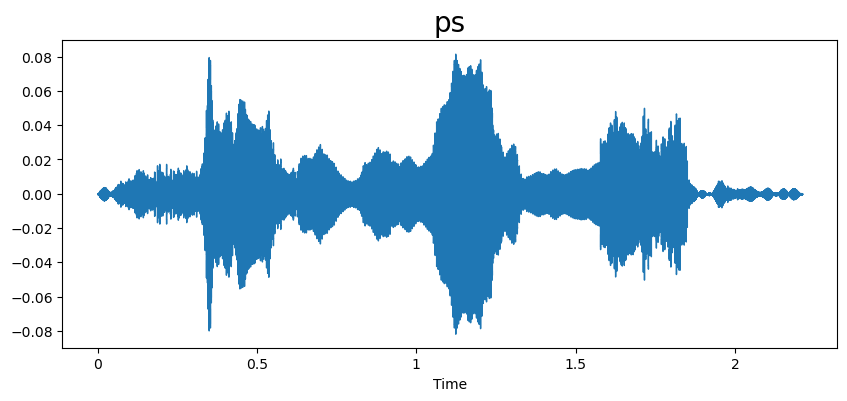

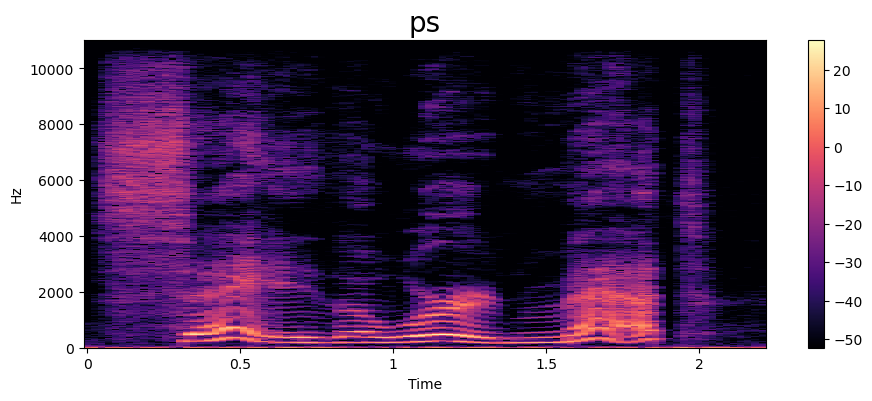

In [82]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


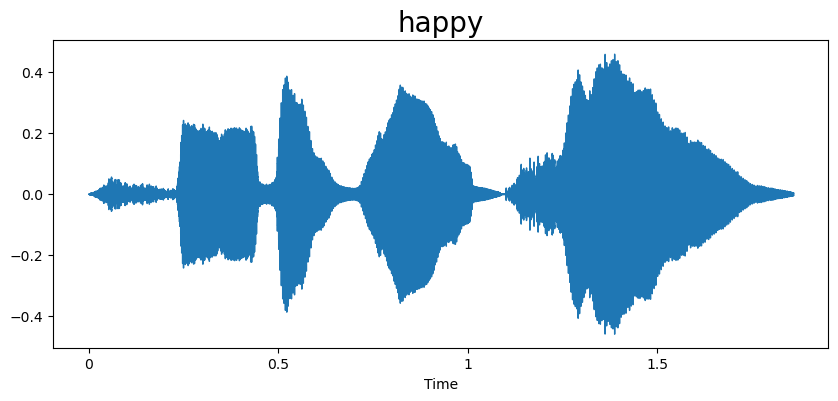

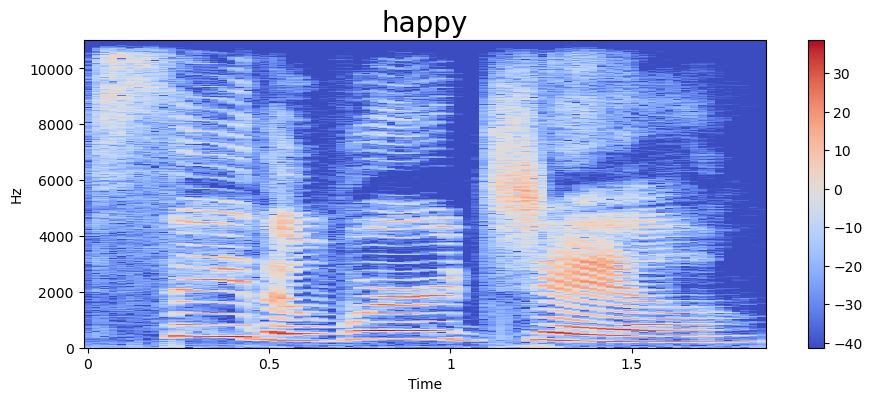

In [83]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

# Feature Extraction

In [85]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [86]:
extract_mfcc(df['speech'][0])

array([-285.73727   ,   85.78295   ,   -2.1689112 ,   22.125532  ,
        -14.757395  ,   11.051346  ,   12.412449  ,   -3.0002618 ,
          1.0844991 ,   11.078272  ,  -17.41966   ,   -8.093213  ,
          6.5879726 ,   -4.2209535 ,   -9.15508   ,    3.52148   ,
        -13.186381  ,   14.078853  ,   19.66973   ,   22.725618  ,
         32.57464   ,   16.325035  ,   -3.8427293 ,    0.89629656,
        -11.239262  ,    6.653462  ,   -2.5883696 ,   -7.7140164 ,
        -10.941658  ,   -2.4007547 ,   -5.281288  ,    4.271157  ,
        -11.202216  ,   -9.024621  ,   -3.6669848 ,    4.869744  ,
         -1.6027985 ,    2.5600514 ,   11.454374  ,   11.233449  ],
      dtype=float32)

In [27]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [87]:
X_mfcc

0       [-285.73727, 85.78295, -2.1689112, 22.125532, ...
1       [-348.34332, 35.193233, -3.841328, 14.658875, ...
2       [-340.11435, 53.796444, -14.267782, 20.884027,...
3       [-306.63422, 21.259708, -4.4110823, 6.4871554,...
4       [-344.7548, 46.329193, -24.171413, 19.392921, ...
                              ...                        
2795    [-374.3952, 60.864998, 0.025059083, 8.431058, ...
2796    [-313.96478, 39.847843, -5.6493053, -3.867575,...
2797    [-357.54886, 77.886055, -15.224756, 2.194633, ...
2798    [-353.1474, 101.68391, -14.175896, -12.037376,...
2799    [-389.4595, 54.042767, 1.346998, -1.4258983, -...
Name: speech, Length: 2800, dtype: object

In [88]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

# input split

In [89]:
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

# Create the LSTM Model

In [90]:
from keras.utils import to_categorical
y=to_categorical(df['labels_encoded'])
y.shape

(2800, 7)

In [91]:
y

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [92]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [93]:
model=Sequential([
    LSTM(123,return_sequences=False,input_shape=(40,1)),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(32,activation='relu'),
    Dropout(0.2),
    Dense(7,activation='softmax')
])

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 123)               61500     
                                                                 
 dense_6 (Dense)             (None, 64)                7936      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 7)                 231       
                                                                 
Total params: 71,747
Trainable params: 71,747
Non-trai

In [94]:
history=model.fit(X,y,validation_split=0.2,epochs=100,batch_size=512,shuffle=True)


Epoch 1/100
5/5 [==============================] - 5s 430ms/step - loss: 1.9123 - accuracy: 0.2281 - val_loss: 1.9735 - val_accuracy: 0.0946
Epoch 2/100
5/5 [==============================] - 1s 234ms/step - loss: 1.7427 - accuracy: 0.4946 - val_loss: 2.0163 - val_accuracy: 0.0000e+00
Epoch 3/100
5/5 [==============================] - 1s 248ms/step - loss: 1.5295 - accuracy: 0.5679 - val_loss: 2.1663 - val_accuracy: 0.0000e+00
Epoch 4/100
5/5 [==============================] - 1s 243ms/step - loss: 1.2760 - accuracy: 0.6219 - val_loss: 2.3708 - val_accuracy: 0.0000e+00
Epoch 5/100
5/5 [==============================] - 1s 255ms/step - loss: 1.0078 - accuracy: 0.6634 - val_loss: 2.5271 - val_accuracy: 0.0000e+00
Epoch 6/100
5/5 [==============================] - 1s 233ms/step - loss: 0.8534 - accuracy: 0.6933 - val_loss: 2.5827 - val_accuracy: 0.0036
Epoch 7/100
5/5 [==============================] - 1s 239ms/step - loss: 0.7347 - accuracy: 0.7259 - val_loss: 2.7192 - val_accuracy: 0.00

# Train and Val accuracy plotting

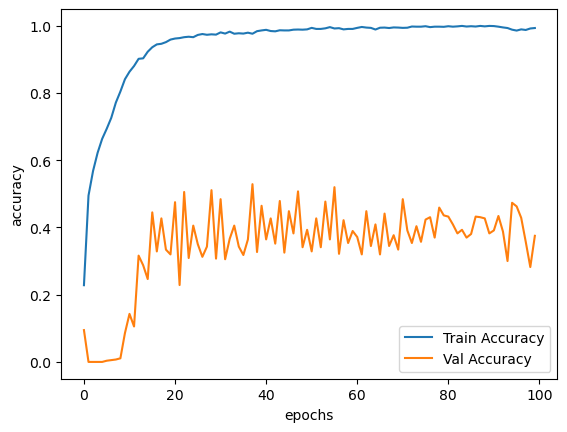

In [95]:
epochs=list(range(100))
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
plt.plot(epochs,acc,label='Train Accuracy')
plt.plot(epochs,val_acc,label='Val Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# Train and Val Loss Plotting

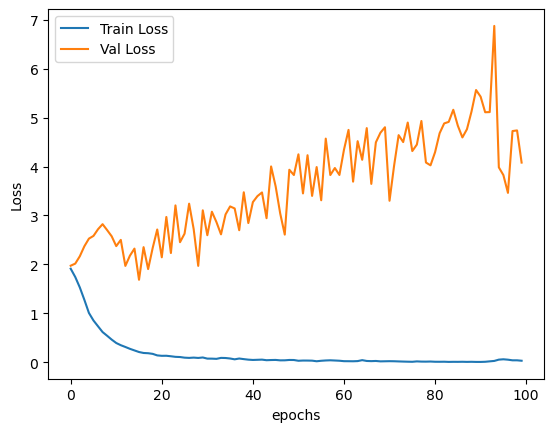

In [96]:
epochs=list(range(100))
loss=history.history['loss']
val_loss=history.history['val_loss']
plt.plot(epochs,loss,label='Train Loss')
plt.plot(epochs,val_loss,label='Val Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Model Prediction

In [98]:
pred_X_mfcc = df['speech'][:2].apply(lambda x: extract_mfcc(x))
pred_X = [x for x in pred_X_mfcc]
pred_X = np.array(pred_X)
pred_X = np.expand_dims(pred_X, -1)

In [99]:
model.predict(pred_X)[0]

1/1 [==============================] - 1s 515ms/step


array([2.85992252e-09, 3.38757429e-12, 9.99987364e-01, 5.63749154e-08,
       6.09937615e-07, 1.04211466e-13, 1.20043960e-05], dtype=float32)

In [100]:
labels[model.predict(pred_X)[0].argmax()]

1/1 [==============================] - 0s 29ms/step


'fear'

# As We can see that in this model value accuracy does not exceeding 50% so we will use same model in different way

# Importing Library

In [101]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa 
import librosa.display
from IPython.display import Audio
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
print("Library is imported for accuracy increasing")

Library is imported for accuracy increasing


# Load Dataset

In [102]:
paths=[]
labels=[]
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename[::-1].split('_')[0][::-1]
        labels.append(label.lower())

data = pd.DataFrame({'speech':paths,'label':labels})
data.sample(5)

,speech,label
3990,/kaggle/input/toronto-emotional-speech-set-tes...,angry.wav
4009,/kaggle/input/toronto-emotional-speech-set-tes...,sad.wav
5435,/kaggle/input/toronto-emotional-speech-set-tes...,ps.wav
1719,/kaggle/input/toronto-emotional-speech-set-tes...,neutral.wav
5360,/kaggle/input/toronto-emotional-speech-set-tes...,sad.wav


In [103]:
data['label'].value_counts()

fear.wav       800
angry.wav      800
disgust.wav    800
neutral.wav    800
sad.wav        800
ps.wav         800
happy.wav      800
Name: label, dtype: int64

# Waveplot and spectogram plotting for different wave

In [104]:
def waveplot(data,sr,emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.waveshow(data,sr=sr)
    plt.show()
    
def spectogram(data,sr,emotion):
    x=librosa.stft(data)
    xdb=librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    librosa.display.specshow(xdb,sr=sr,x_axis='time',y_axis='hz')
    plt.colorbar()
    
def ana_emotion(emotion:str, df:pd.DataFrame):
    path=np.array(df['speech'][df['label']==emotion])[0]
    data,sampling_rate=librosa.load(path)
    waveplot(data,sampling_rate,emotion)
    spectogram(data,sampling_rate,emotion)
    display(Audio(path))

# Labeling

In [105]:
x=data.groupby("label")["label"].count().sort_values(ascending=False)
x

label
angry.wav      800
disgust.wav    800
fear.wav       800
happy.wav      800
neutral.wav    800
ps.wav         800
sad.wav        800
Name: label, dtype: int64

#  Pie plot of labels

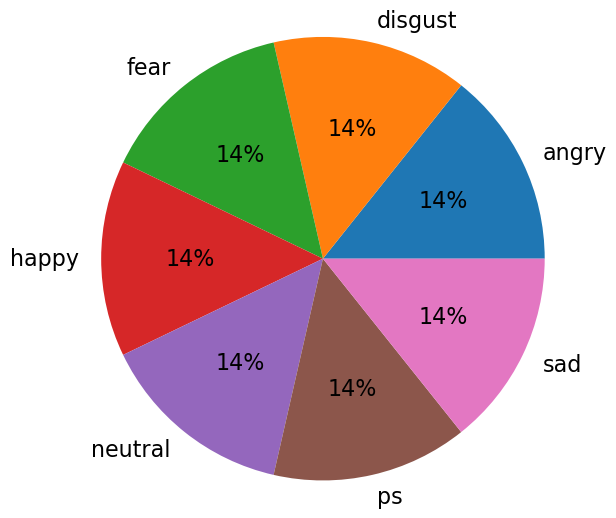

In [106]:
labels = ["angry", "disgust" ,"fear", "happy" ,"neutral" ,"ps","sad"]
plt.pie(x, labels = labels, autopct = '%.0f%%', radius= 1.5, textprops={'fontsize': 16})
plt.show()

# We can see that all the emotions labels are equally distributed in the dataset.

# MFCC defining

In [ ]:
def MFCC(filename):
    y, sr = librosa.load(filename,duration=3,offset=0.5)
    return np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)

mfcc= data['speech'].apply(lambda x:MFCC(x))

In [107]:
mfcc

0       [-285.73727, 85.78295, -2.1689112, 22.125532, ...
1       [-348.34332, 35.193233, -3.841328, 14.658875, ...
2       [-340.11435, 53.796444, -14.267782, 20.884027,...
3       [-306.63422, 21.259708, -4.4110823, 6.4871554,...
4       [-344.7548, 46.329193, -24.171413, 19.392921, ...
                              ...                        
5595    [-374.3952, 60.864998, 0.025059083, 8.431058, ...
5596    [-313.96478, 39.847843, -5.6493053, -3.867575,...
5597    [-357.54886, 77.886055, -15.224756, 2.194633, ...
5598    [-353.1474, 101.68391, -14.175896, -12.037376,...
5599    [-389.4595, 54.042767, 1.346998, -1.4258983, -...
Name: speech, Length: 5600, dtype: object

In [108]:
X=[x for x in mfcc]
X=np.array(X)
X.shape
X=np.expand_dims(X,-1)
X.shape

(5600, 40, 1)

# One Hot Encoding

In [109]:
ohe=OneHotEncoder()
y = ohe.fit_transform( data[['label']] )
y= y.toarray()

# Train and test test splitting

In [110]:
from sklearn.model_selection import train_test_split

In [112]:
x_train , x_test , y_train , y_test = train_test_split(X,y, test_size= 0.20, random_state =30)

#  create LSTM  model

In [113]:
model=Sequential([
    LSTM(256,return_sequences=False,input_shape=(40,1)),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(7,activation='softmax')
])

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 256)               264192    
                                                                 
 dense_9 (Dense)             (None, 128)               32896     
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 7)                 455       
                                                                 
Total params: 305,799
Trainable params: 305,799
Non-tr

In [114]:
history=model.fit(x_train,y_train,validation_split=0.2,epochs=25,batch_size=64)

Epoch 1/25
56/56 [==============================] - 13s 180ms/step - loss: 0.9596 - accuracy: 0.6244 - val_loss: 0.3133 - val_accuracy: 0.8996
Epoch 2/25
56/56 [==============================] - 9s 168ms/step - loss: 0.3110 - accuracy: 0.9007 - val_loss: 0.2279 - val_accuracy: 0.9107
Epoch 3/25
56/56 [==============================] - 9s 168ms/step - loss: 0.1609 - accuracy: 0.9540 - val_loss: 0.1626 - val_accuracy: 0.9453
Epoch 4/25
56/56 [==============================] - 9s 168ms/step - loss: 0.1693 - accuracy: 0.9448 - val_loss: 0.0955 - val_accuracy: 0.9676
Epoch 5/25
56/56 [==============================] - 9s 165ms/step - loss: 0.1074 - accuracy: 0.9651 - val_loss: 0.0706 - val_accuracy: 0.9810
Epoch 6/25
56/56 [==============================] - 9s 169ms/step - loss: 0.1233 - accuracy: 0.9598 - val_loss: 0.1236 - val_accuracy: 0.9609
Epoch 7/25
56/56 [==============================] - 9s 167ms/step - loss: 0.0971 - accuracy: 0.9688 - val_loss: 0.0594 - val_accuracy: 0.9777
Epoch

# PLOT OF TRAIN ACCURACY AND VALUE ACCURACY

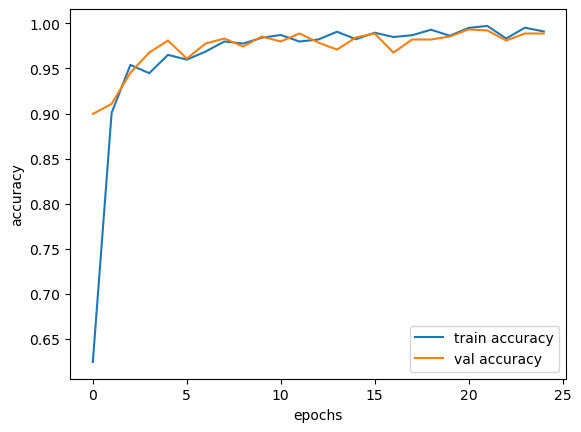

In [115]:
epochs = list(range(25))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# MODEL EVALUATION

In [116]:
model.evaluate(x_train , y_train)

140/140 [==============================] - 7s 43ms/step - loss: 0.0233 - accuracy: 0.9924


[0.023267390206456184, 0.9924107193946838]

# TEST PREDICTION

In [117]:
y_pred = model.predict(x_test, batch_size=5)

224/224 [==============================] - 4s 17ms/step


# MODEL SCORE CHECKING

In [118]:
scores=model.evaluate(x_test , y_test)
print ("Model evaluation accuracy: ", round(scores[1]*100),"%")

35/35 [==============================] - 2s 48ms/step - loss: 0.0326 - accuracy: 0.9893
Model evaluation accuracy:  99 %


# We can check that now accuracy is 99% which is best

In [120]:
model.save('Emotions_Classification.h5')

# Decision Tree

In [122]:
paths = []  
labels = []
for dirname, _, filenames in os.walk('../input/toronto-emotional-speech-set-tess/'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]  #to store the label such as fear happy sad
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [123]:
labels[:100:7]

['fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear']

In [124]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths #input as speech
df['label'] = labels #output as label
df.head()

,speech,label
0,../input/toronto-emotional-speech-set-tess/TES...,fear
1,../input/toronto-emotional-speech-set-tess/TES...,fear
2,../input/toronto-emotional-speech-set-tess/TES...,fear
3,../input/toronto-emotional-speech-set-tess/TES...,fear
4,../input/toronto-emotional-speech-set-tess/TES...,fear


In [125]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [126]:
extract_mfcc(df['speech'][0])

array([-285.73727   ,   85.78295   ,   -2.1689112 ,   22.125532  ,
        -14.757395  ,   11.051346  ,   12.412449  ,   -3.0002618 ,
          1.0844991 ,   11.078272  ,  -17.41966   ,   -8.093213  ,
          6.5879726 ,   -4.2209535 ,   -9.15508   ,    3.52148   ,
        -13.186381  ,   14.078853  ,   19.66973   ,   22.725618  ,
         32.57464   ,   16.325035  ,   -3.8427293 ,    0.89629656,
        -11.239262  ,    6.653462  ,   -2.5883696 ,   -7.7140164 ,
        -10.941658  ,   -2.4007547 ,   -5.281288  ,    4.271157  ,
        -11.202216  ,   -9.024621  ,   -3.6669848 ,    4.869744  ,
         -1.6027985 ,    2.5600514 ,   11.454374  ,   11.233449  ],
      dtype=float32)

In [127]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [128]:
X_mfcc

0       [-285.73727, 85.78295, -2.1689112, 22.125532, ...
1       [-348.34332, 35.193233, -3.841328, 14.658875, ...
2       [-340.11435, 53.796444, -14.267782, 20.884027,...
3       [-306.63422, 21.259708, -4.4110823, 6.4871554,...
4       [-344.7548, 46.329193, -24.171413, 19.392921, ...
                              ...                        
2795    [-374.3952, 60.864998, 0.025059083, 8.431058, ...
2796    [-313.96478, 39.847843, -5.6493053, -3.867575,...
2797    [-357.54886, 77.886055, -15.224756, 2.194633, ...
2798    [-353.1474, 101.68391, -14.175896, -12.037376,...
2799    [-389.4595, 54.042767, 1.346998, -1.4258983, -...
Name: speech, Length: 2800, dtype: object

In [129]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [156]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])
print(y)

  (0, 2)	1.0
  (1, 2)	1.0
  (2, 2)	1.0
  (3, 2)	1.0
  (4, 2)	1.0
  (5, 2)	1.0
  (6, 2)	1.0
  (7, 2)	1.0
  (8, 2)	1.0
  (9, 2)	1.0
  (10, 2)	1.0
  (11, 2)	1.0
  (12, 2)	1.0
  (13, 2)	1.0
  (14, 2)	1.0
  (15, 2)	1.0
  (16, 2)	1.0
  (17, 2)	1.0
  (18, 2)	1.0
  (19, 2)	1.0
  (20, 2)	1.0
  (21, 2)	1.0
  (22, 2)	1.0
  (23, 2)	1.0
  (24, 2)	1.0
  :	:
  (2775, 5)	1.0
  (2776, 5)	1.0
  (2777, 5)	1.0
  (2778, 5)	1.0
  (2779, 5)	1.0
  (2780, 5)	1.0
  (2781, 5)	1.0
  (2782, 5)	1.0
  (2783, 5)	1.0
  (2784, 5)	1.0
  (2785, 5)	1.0
  (2786, 5)	1.0
  (2787, 5)	1.0
  (2788, 5)	1.0
  (2789, 5)	1.0
  (2790, 5)	1.0
  (2791, 5)	1.0
  (2792, 5)	1.0
  (2793, 5)	1.0
  (2794, 5)	1.0
  (2795, 5)	1.0
  (2796, 5)	1.0
  (2797, 5)	1.0
  (2798, 5)	1.0
  (2799, 5)	1.0


In [157]:
y = y.toarray()

In [158]:
y.shape

(2800, 7)

In [159]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2100, 40), (2100, 7), (700, 40), (700, 7))

In [160]:
X_train = x_train.reshape(x_train.shape[0] , x_train.shape[1] , 1)
X_test = x_test.reshape(x_test.shape[0] , x_test.shape[1] , 1)

In [161]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2100, 40), (2100, 7), (700, 40), (700, 7))

# Decision Tree

In [162]:
from sklearn.tree import DecisionTreeClassifier
clf3 = DecisionTreeClassifier()

clf3 = clf3.fit(x_train,y_train)

y_pred = clf3.predict(x_test)

In [163]:
print("Training set score: {:.3f}".format(clf3.score(x_train, y_train)))
print("Test set score: {:.3f}".format(clf3.score(x_test, y_test)))

Training set score: 1.000
Test set score: 0.901


# For Decision Tree Test set score is at around 91%

# Thank you